In [185]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,LSTM
from keras.layers import Activation, Dropout,BatchNormalization
from keras import optimizers
from keras import applications
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math 
import datetime
import time
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler


In [186]:
train_dataset=pd.read_csv('/home/heroo/Downloads/datascence _coursera/P16-Recurrent-Neural-Networks/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')

In [187]:
test_dataset=pd.read_csv('/home/heroo/Downloads/datascence _coursera/P16-Recurrent-Neural-Networks/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')

In [188]:
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [189]:
train_dataset.shape

(1258, 6)

In [190]:
train_dataset['Date']=pd.to_datetime(train_dataset['Date'])

In [191]:
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [192]:
test_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [193]:
test_dataset['Date']=pd.to_datetime(test_dataset['Date'])

In [194]:
test_dataset.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [195]:
x_train=train_dataset.iloc[:,1:2].values

In [196]:
x_train.shape

(1258, 1)

In [197]:
obj=MinMaxScaler(feature_range=(0,1))
x_train=obj.fit_transform(x_train)

In [198]:
x_train[0]

array([0.08581368])

In [199]:
X_train=x_train[0:1257]
Y_train=x_train[1:1258]

In [200]:
Xx_train=np.reshape(X_train,(1257,1,1))

In [201]:
reg=Sequential()
reg.add(LSTM(units=4,activation='sigmoid',input_shape=(1,1)))
reg.add(Dense(units=1))
reg.compile(optimizer='adam',loss='mean_squared_error')

In [202]:
reg.fit(Xx_train,Y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s 311us/step - loss: 0.3870
Epoch 2/200
1257/1257 [==============================] - 0s 66us/step - loss: 0.2975
Epoch 3/200
1257/1257 [==============================] - 0s 66us/step - loss: 0.2285
Epoch 4/200
1257/1257 [==============================] - 0s 65us/step - loss: 0.1773
Epoch 5/200
1257/1257 [==============================] - 0s 70us/step - loss: 0.1404
Epoch 6/200
1257/1257 [==============================] - 0s 61us/step - loss: 0.1150
Epoch 7/200
1257/1257 [==============================] - 0s 64us/step - loss: 0.0981
Epoch 8/200
1257/1257 [==============================] - 0s 62us/step - loss: 0.0876
Epoch 9/200
1257/1257 [==============================] - 0s 63us/step - loss: 0.0814
Epoch 10/200
1257/1257 [==============================] - 0s 65us/step - loss: 0.0776
Epoch 11/200
1257/1257 [==============================] - 0s 63us/step - loss: 0.0755
Epoch 12/200
1257/1257 [==============================] - 0s 6

1257/1257 [==============================] - 0s 65us/step - loss: 2.9742e-04
Epoch 96/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.9619e-04
Epoch 97/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.9518e-04
Epoch 98/200
1257/1257 [==============================] - 0s 64us/step - loss: 2.9526e-04
Epoch 99/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.9327e-04
Epoch 100/200
1257/1257 [==============================] - 0s 61us/step - loss: 2.9379e-04
Epoch 101/200
1257/1257 [==============================] - 0s 61us/step - loss: 2.9241e-04
Epoch 102/200
1257/1257 [==============================] - 0s 60us/step - loss: 2.9177e-04
Epoch 103/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.9201e-04
Epoch 104/200
1257/1257 [==============================] - 0s 63us/step - loss: 2.9085e-04
Epoch 105/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.9099e-04
Epoch 106/200
125

1257/1257 [==============================] - 0s 62us/step - loss: 2.6906e-04
Epoch 186/200
1257/1257 [==============================] - 0s 56us/step - loss: 2.7500e-04
Epoch 187/200
1257/1257 [==============================] - 0s 63us/step - loss: 2.7428e-04
Epoch 188/200
1257/1257 [==============================] - 0s 59us/step - loss: 2.6957e-04
Epoch 189/200
1257/1257 [==============================] - 0s 57us/step - loss: 2.7082e-04
Epoch 190/200
1257/1257 [==============================] - 0s 57us/step - loss: 2.7032e-04
Epoch 191/200
1257/1257 [==============================] - 0s 58us/step - loss: 2.6989e-04
Epoch 192/200
1257/1257 [==============================] - 0s 53us/step - loss: 2.6873e-04
Epoch 193/200
1257/1257 [==============================] - 0s 59us/step - loss: 2.7058e-04
Epoch 194/200
1257/1257 [==============================] - 0s 56us/step - loss: 2.7183e-04
Epoch 195/200
1257/1257 [==============================] - 0s 55us/step - loss: 2.7134e-04
Epoch 196/200

In [203]:
test=test_dataset.iloc[:,1:2].values

In [204]:
test.shape
tst=test

In [205]:
test=obj.transform(test)

In [206]:
test=np.reshape(test,(20,1,1))

In [207]:
pred=reg.predict(test)

In [208]:
pred=obj.inverse_transform(pred)

In [209]:
print(pred)

[[775.1602 ]
 [783.2228 ]
 [781.3094 ]
 [788.9688 ]
 [798.10345]
 [799.2876 ]
 [796.9652 ]
 [798.70404]
 [798.9797 ]
 [798.65533]
 [797.6242 ]
 [797.06287]
 [798.51746]
 [798.79315]
 [810.8329 ]
 [816.5699 ]
 [822.89594]
 [820.51306]
 [804.76196]
 [790.2916 ]]


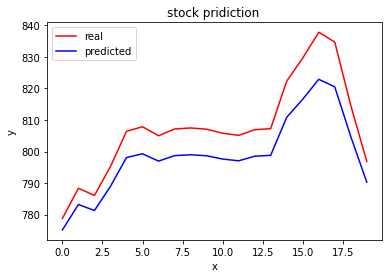

In [210]:
plt.plot(tst,color='red',label='real')
plt.plot(pred,color='blue',label='predicted')
plt.title('stock pridiction ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [211]:
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(tst,pred))
rmse/800

0.01140208744234879

In [212]:
x_train=train_dataset.iloc[:,1:2].values
obj=MinMaxScaler(feature_range=(0,1))
x_train=obj.fit_transform(x_train)
Xx_train = []
y_train = []
for i in range(60, 1258):
    Xx_train.append(x_train[i-60:i, 0])
    y_train.append(x_train[i, 0])
Xx_train, y_train = np.array(Xx_train), np.array(y_train)



In [213]:
st=Xx_train.shape[0]
nd=Xx_train.shape[1]
training_data=np.reshape(Xx_train,(st,nd,1))

In [214]:
new=Sequential()
new.add(LSTM(units=50,return_sequences=True,input_shape=(nd,1)))
new.add(Dropout(0.2))

In [215]:

new.add(LSTM(units=50,return_sequences=True))
new.add(Dropout(0.2))

In [216]:
new.add(LSTM(units=50,return_sequences=True))
new.add(Dropout(0.2))

In [221]:
new.add(LSTM(units=50))
new.add(Dropout(0.2))

In [222]:
#new.add(LSTM(units=50))
#new.add(Dropout(0.2))

In [223]:
new.add(Dense(units=1))

In [224]:
new.compile(optimizer='adam',loss='mean_squared_error')
new.fit(training_data,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0641
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0086
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0074
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0063
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0058
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0056
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016


In [225]:

test_data=pd.concat((train_dataset['Open'],test_dataset['Open']),axis=0)


In [226]:
test_data.shape

(1278,)

In [227]:
test = test_data[len(test_data) - len(test_dataset) - 60:].values

In [228]:
test.shape

(80,)

In [229]:
len(test_data)

1278

In [230]:
test=test.reshape(-1,1)
test=obj.transform(test)

In [231]:
X_test=[]
for i in range(60, 80):
    X_test.append(test[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred = new.predict(X_test)
y_pred = obj.inverse_transform(y_pred)


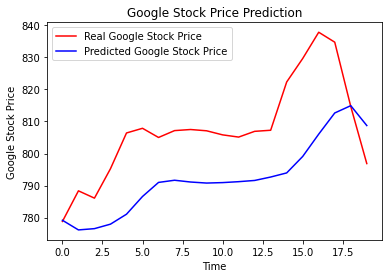

In [232]:
plt.plot(tst, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()